You are inside the object! Get out of there!


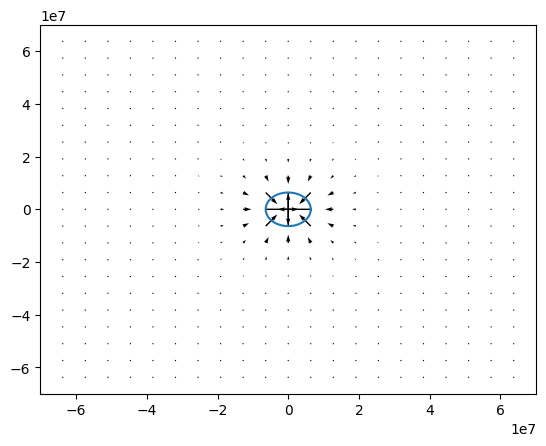

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# constants
G = 6.67E-11 # Nm^2/kg^2
M = 5.97E+24 # kg
r_E = 6.378E+6 # m
pos_E = np.array([0, 0]) # position of the earth in meters

# set up coordinate system
x = np.linspace(-10 * r_E, 10 * r_E, 21)
y = np.linspace(-10 * r_E, 10 * r_E, 21)

X,Y = np.meshgrid(x, y)

# set everything zero first
u = np.zeros(X.shape)
v = np.zeros(Y.shape)

def g_field(m, r_o, pos_o, pos_x, pos_y):
    rx = pos_o[0] - pos_x # x distance from the object
    ry = pos_o[1] - pos_y # y distance from the object
    r = np.array([rx, ry])
    r_mag = np.linalg.norm(r)
    if r_mag < r_o:
        print("You are inside the object! Get out of there!")
        return (0,0)
    rhat = r / r_mag
    g_mag = G * m / (r_mag ** 2) # magnitude of the field strength, N / kg
    gx = g_mag * rhat[0] 
    gy = g_mag * rhat[1]
    return (gx, gy)

# run the function over every point on the grid
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        u[i,j],v[i,j] = g_field(M, r_E, pos_E ,X[i,j], Y[i,j])

plt.quiver(X, Y, u, v, scale=98*1.5)
plt.plot(r_E*np.cos(np.linspace(0,np.pi*2,361)),r_E*np.sin(np.linspace(0,np.pi*2,361)))
